# Using betterplotlib

This page will demonstrate the power of betterplotlib, and hopefully show why it can be useful to you.

In [1]:
%matplotlib inline
import betterplotlib as bpl
import numpy as np
import matplotlib.pyplot as plt

The first thing betterplotlib can do is set the styles to be much better than they were in default matplotlib. This is just one command. We'll set the default style, which is normally the ideal one to use.

In [2]:
bpl.default_style()

We can then start using betterplotlib. Note that if you have any questions about a given function and what it does, there are examples in the documentation of each function that are more complete than what is found here. This is just an overview of the cool stuff betterplotlib can do.

For all the plots we will do, the best way to access the betterplotlib interface is to use the `bpl.subplots()` function, which is an exact analog of the `plt.subplots()` function, which is my favorite way to access the matplotlib objects. When you do this, it creates a regular matplotlib figure with betterplotlib axes objects, which is where all the magic happens.

## Histograms

First, let's do a comparison of how betterplotlib's histogram is actually better. We'll make the same plot with the default hist() and with bpl.hist(). The only parameter we will use is alpha so we can plot two distributions at once and still see them both. I'll do some trickery here with the axes to show betterplotlib versus matplotlib, but you won't have to do that when plotting yourself.

Note that the syntax is exactly the same for the plotting of both plots. The betterplotlib axes objects overload the functions that matplotlib has created to make them better.

In [3]:
x1 = np.random.normal(-1, 2, 5000)
x2 = np.random.normal(1, 2, 5000)

/Users/gillenb/miniconda3/envs/general/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


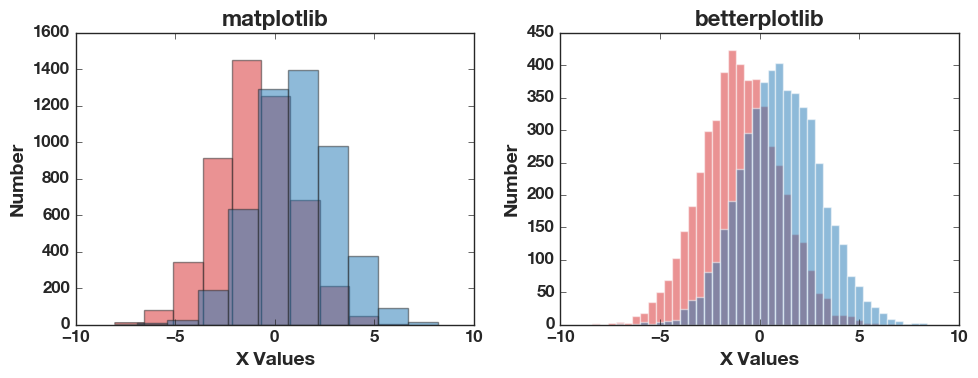

In [4]:
fig = plt.figure(figsize=[10, 4], tight_layout=True)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2, projection="bpl")

# matplotlib plot
ax1.hist(x1, alpha=0.5)
ax1.hist(x2, alpha=0.5)
ax1.set_xlabel("X Values")
ax1.set_ylabel("Number")
ax1.set_title("matplotlib")

# betterplotlib plot
ax2.hist(x1, alpha=0.5)
ax2.hist(x2, alpha=0.5)
ax2.add_labels("X Values", "Number", "betterplotlib")

Some things to note: The bin size is chosen much better in the betterplotlib plot. The bins line up with each other, too. This doesn't always happen in betterplotlib without user intervention, but sometimes does. The white outline on the bars looks nicer than the black. Also note that the color cycle is changed, as well as the font. This is the same for both plots, since it was done by the `bpl.default_style()` function above. The matplotlib plot would look even worse without it. Also note how much less work it is to set the axes labels with betterplotlib.
There are some extra parameters that can be passed in to `bpl.hist()` that `plt.hist()` doesn't have, too. I also make a dark axis, which makes some plots look nicer.

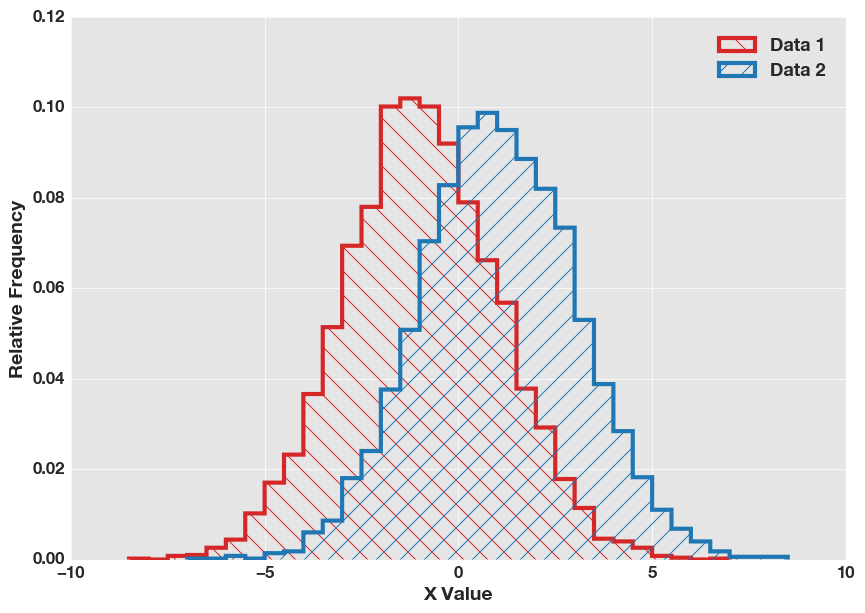

In [5]:
fig, ax = bpl.subplots()

ax.hist(x1, rel_freq=True, histtype="step", bin_size=0.5, lw=3, hatch="\\", label="Data 1")
ax.hist(x2, rel_freq=True, histtype="step", bin_size=0.5, lw=3, hatch= "/", label="Data 2")

ax.make_ax_dark()
ax.add_labels("X Value", "Relative Frequency")
ax.set_limits(-10, 10, 0, 0.12)
ax.legend();

Note the different paramters that the histogram function takes, as well as the convenience functions afterward that make for a better looking plot in fewer steps. Also, when we pass in bin_size, the bins will always line up, which makes for much nicer looking plots with multiple data sets.

## Scatter

The default scatter plot in matplotlib is truly bad. Here's an example.

In [6]:
x1 = np.random.normal(2, 1, 1000)
y1 = np.random.normal(0, 1, 1000)

x2 = np.random.normal(4, 1, 1000)
y2 = np.random.normal(2, 1, 1000)

x3 = np.random.normal(2, 1, 1000)
y3 = np.random.normal(2, 1, 1000)

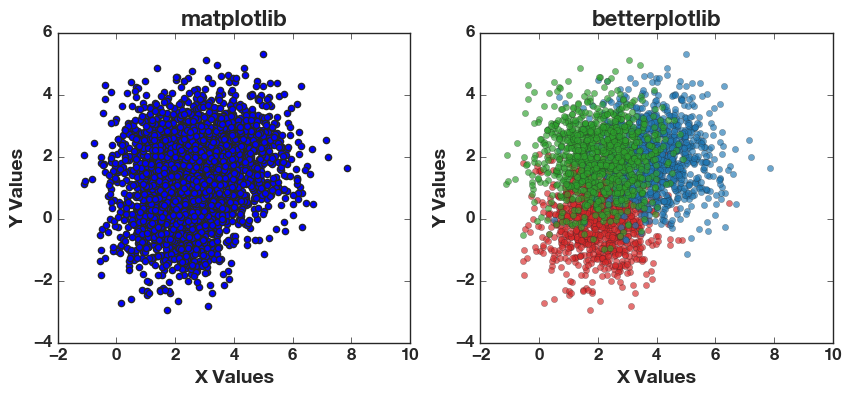

In [7]:
fig = plt.figure(figsize=[10, 4])
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2, projection="bpl")

# matplotlib plot
ax1.scatter(x1, y1)
ax1.scatter(x2, y2)
ax1.scatter(x3, y3)
ax1.set_xlabel("X Values")
ax1.set_ylabel("Y Values")
ax1.set_title("matplotlib")

# betterplotlib plot
ax2.scatter(x1, y1)
ax2.scatter(x2, y2)
ax2.scatter(x3, y3)
ax2.add_labels("X Values", "Y Values", "betterplotlib")

Note how matplotlib's scatter doesn't use the color cycle, has thick borders around its points, and doesn't use transparency. In contrast, `bpl.scatter()` does use the color cycle, has thin marker edges, and picks an alpha value somewhat smartly based on the number of points in the plot.

## Contour

While the default contour in matplotlib is fine, I have created a function to easily make contours based on the density of points. We'll create a dataset similar to the one above.

In [8]:
xs = np.concatenate([np.random.normal(0, 1, 10000),
                     np.random.normal(3, 1, 10000),
                     np.random.normal(0, 1, 10000)])
ys = np.concatenate([np.random.normal(0, 1, 10000),
                     np.random.normal(3, 1, 10000),
                     np.random.normal(3, 1, 10000)])

There are a ton of parameters that this function can take, but we'll only show a few of them. To see them all, check the documentation for that function. This function is hugely versatile, and can make a ton of different-looking plots based on the parameters passed in.

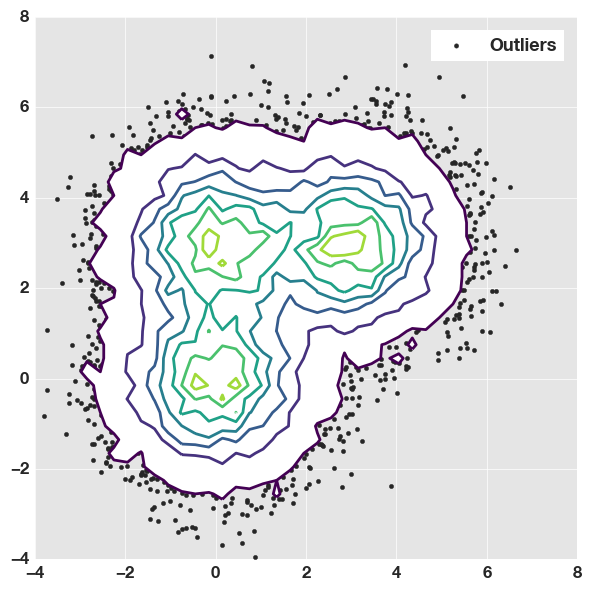

In [9]:
fig, ax = bpl.subplots()
ax.contour_scatter(xs, ys, bin_size=0.3, scatter_kwargs={"label":"Outliers"})
ax.equal_scale()
ax.make_ax_dark()
ax.set_limits(-4, 8, -4, 8)
ax.legend("light");

## Convenience Functions

There are a ton of convenience functions, as demonstrated above. Check the API Overview page for more information on all of these things. Here is a demonstration of some of the more useful ones.

In [10]:
xs = np.random.normal(0, 1, 100)
ys = np.random.normal(0, 1, 100)

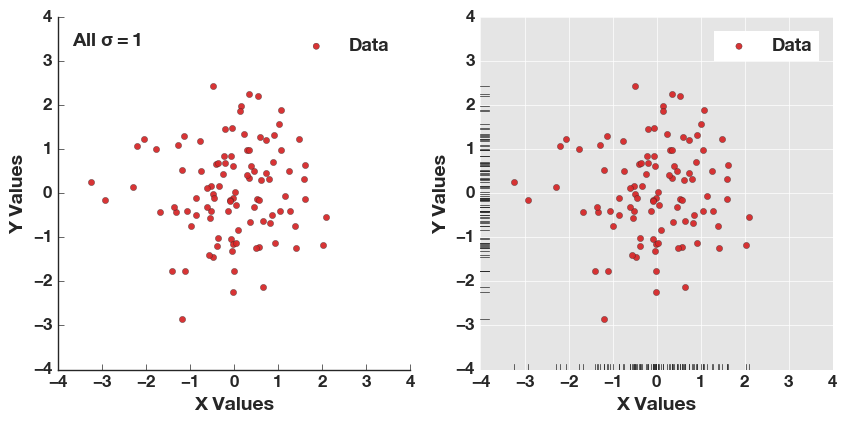

In [11]:
fig, [ax1, ax2] = bpl.subplots(ncols=2)

ax1.scatter(xs, ys, label="Data")

ax1.add_labels("X Values", "Y Values")
ax1.set_limits(-4, 4, -4, 4)
ax1.equal_scale()
ax1.remove_spines(["top", "right"])
ax1.easy_add_text(r"All $\mathregular{\sigma = 1}$", "upper left")
ax1.legend()

ax2.scatter(xs, ys, label="Data")
ax2.data_ticks(xs, ys)
ax2.equal_scale()
ax2.make_ax_dark()
ax2.set_limits(-4, 4, -4, 4)
ax2.legend(facecolor="light")
ax2.add_labels("X Values", "Y Values")

There are some additional convenience functions that are in the documentation.

## Imperative Interface

In the previoue examples we used the object oriented interface, where we use the axes objects directly. That isn't necessary, however, and we can use betterplotlib exactly like matplotlib's `pyplot` interface. Here is an example.

In [12]:
data = np.random.normal(0, 1, 100000)

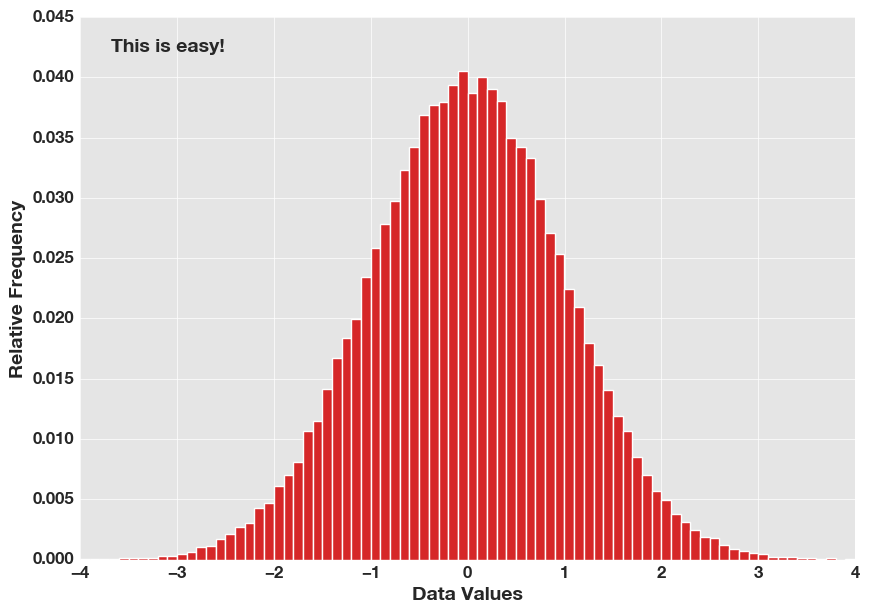

In [13]:
bpl.hist(data, rel_freq=True, bin_size=0.1)
bpl.set_limits(-4, 4)
bpl.make_ax_dark()
bpl.add_labels("Data Values", "Relative Frequency")
bpl.easy_add_text("This is easy!", "upper left");